# Importing Necessary Libraries

In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import pickle
import xlrd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
import keras.backend as K
from keras.models import load_model
import keras
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Conv3D, BatchNormalization, Add, ReLU, AveragePooling2D, ZeroPadding2D, Dropout
import time

%matplotlib inline

C:\Users\npl\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Data Preparation

## Defining some funcitons

In [3]:
def process(image):
    
    image_og = image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    some = cv2.resize(image, (100, 100))/255
    some = some.reshape(1, 100, 100, 1)
    
    return some

# Simplifying the 'pickling' process as we'll need this quite often
def pickleIn(name):    
    # 'name' - name of the file we wish to load (should be a string, eg. 'train_batch.pickle')
    pickle_in = open(name,'rb')
    return pickle.load(pickle_in)

def pickleOut(name, to_be_stored):
    # 'name' - name of the file we wish to store (should be a string, eg. 'train_batch.pickle')
    # 'to_be_stored' - the variable of which we'll be making the "pickle" 
    pickle_out = open(name,'wb')
    pickle.dump(to_be_stored, pickle_out)
    pickle_out.close

Below have we provided 4 variables - *'x_train', 'y_train', 'x_valid', 'y_valid'*

'x_train' and 'x_valid' are 4D Tensors
'y_train' and 'y_valid' are 2D Tensors

All of them are initialized with '0'

Now to train the model we have to feed it with actual 12000 images in the form of x_train (pre-processed) and 2000 images in x_valid and their respective labels in y_train and y_labels

*Kindly refer Approach_text.pdf to know how to make the image labels*

In [ ]:
x_train = np.zeros((12000,100,100,1))
y_train = np.zeros((12000,4))
x_valid = np.zeros((2000,100,100,1))
y_valid = np.zeros((2000,4))

Google drive link to *d2c_data.tar* - https://drive.google.com/open?id=1RVoKzP6IeulTmuLRg6cgsoVEr3RcJAe-

It containes -
    *x_train.pickle*
    *y_train.pickle*
    *x_valid.pickle*
    *y_valid.pickle*

In [5]:
# Write your code here or use this code of mine #

# the Training Files
x_train = pickleIn('x_train.pickle')
y_train = pickleIn('y_train.pickle')
x_valid = pickleIn('x_valid.pickle')
y_valid = pickleIn('y_valid.pickle')

# Training Phase

## EITHER we can DIRECTLY LOAD the MODEL OR skip to 'Building our Model'

We have stored the weights in the file named *model_0028.h5*

and here is the google drive link to the model - https://drive.google.com/file/d/1WlQhOJZz4EEMkm8B6Y83trPUUEfya83C/view?usp=sharing

In [4]:
model = load_model('model_0028.h5')

## Building our Model

In [ ]:
input_ = Input(shape = (100,100,1))

layer = ZeroPadding2D(padding=(1, 1), data_format=None)(input_)

layer = Conv2D(5, kernel_size=(2, 2), activation='relu')(layer)
layer = Conv2D(5, (2, 2), activation='relu')(layer)
layer_1 = BatchNormalization()(layer)

layer = ZeroPadding2D(padding=(1, 1), data_format=None)(layer_1)

layer = Conv2D(10, (2, 2), activation='relu')(layer)
layer = Conv2D(10, (2, 2), activation='relu')(layer)
layer = BatchNormalization()(layer)

#Residual_1
res_layer_1 = Conv2D(5, (1, 1), activation = 'relu')(layer)
res_layer_1 = BatchNormalization()(res_layer_1)
res_layer_1 = keras.layers.add([layer_1, res_layer_1])
res_layer_1 = BatchNormalization()(res_layer_1)

layer = AveragePooling2D(pool_size=(2, 2))(res_layer_1)

layer = Conv2D(15, (2, 2), activation='relu')(layer)
layer = Conv2D(15, (2, 2), activation='relu')(layer)
layer_2 = BatchNormalization()(layer)

layer = ZeroPadding2D(padding=(1, 1), data_format=None)(layer_2)

layer = Conv2D(20, (2, 2), activation='relu')(layer)
layer = Conv2D(20, (2, 2), activation='relu')(layer)
layer = BatchNormalization()(layer)

#Residual_2
res_layer_2 = Conv2D(15, (1, 1), activation = 'relu')(layer)
res_layer_2 = BatchNormalization()(res_layer_2)
res_layer_2 = keras.layers.add([layer_2, res_layer_2])
res_layer_2 = Dropout(.2)(res_layer_2)
res_layer_2 = BatchNormalization()(res_layer_2)

layer = AveragePooling2D(pool_size=(2, 2))(res_layer_2)

layer = Conv2D(20, (2, 2), activation='relu')(layer)
layer = Conv2D(20, (2, 2), activation='relu')(layer)
layer_3 = BatchNormalization()(layer)

layer = Conv2D(20, (3, 3), activation='relu')(layer_3)
layer = Conv2D(20, (3, 3), activation='relu')(layer)


layer = Dropout(0.2)(layer)
layer = BatchNormalization()(layer)

layer_4 = AveragePooling2D(pool_size=(2, 2))(layer)

layer = Flatten()(layer_4)

layer_7 = Dense(500, activation='relu')(layer)
layer_8 = Dense(500, activation='relu')(layer_7)

layer = Dropout(0.5)(layer_8)

box = Dense(4)(layer)



## Compliling Our Model

In [ ]:
model = Model(inputs = input_, outputs = box)

model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

## Training the Model

In [ ]:
epochs = 100
batch_size = 480

model.fit(x_train_augment, y_train_augment,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          class_weight=[1,1,10,10],
          validation_data=(x_test_augment, y_test_augment))

score = model.evaluate(x_test_augment, y_test_augment, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Prediction Phase

## Test Data Preparation

*x_test* is also a 4D Tensor of size *(Number, 100, 100, 1)* where *Number* is the number of test samples one plans to give to the model to predict 

In [ ]:
Number = #Enter a number here#

x_test = np.zeros((Number, 100, 100, 1))

In [ ]:
for i in range(Number):
    
    im_loc = 'C:/location/example' # here will the location of images go in
    
    x_test[i,:,:,:] = process(cv2.imread(im_loc))

In [30]:
pred = model.predict(x_test[0:2,:,:,:])

In [31]:
print(pred)

[[0.5267871  0.5094267  0.35535783 0.66509175]
 [0.50417024 0.52293444 0.7433772  0.43731084]]


## Defining Some Functions 

***iou*** would be used to calculate the Intersection over Union for bounding boxes

In [ ]:
def iou(y_true, y_pred):

    x_t = y_true[0]
    y_t = y_true[1]
    w_t = y_true[2]
    h_t = y_true[3]

    # Calculating the Co-ordinates from Center and Length Values (Actual Square)
    x1_t = ((2*x_t) - w_t)/2
    y1_t = ((2*y_t) - h_t)/2
    x2_t = ((2*x_t) + w_t)/2
    y2_t = ((2*y_t) + h_t)/2

    x_p = y_pred[0]
    y_p = y_pred[1]
    w_p = y_pred[2]
    h_p = y_pred[3]

    # Calculating the Co-ordinates from center and length values (Prediction Square)
    x1_p = ((2*x_p) - w_p)/2
    y1_p = ((2*y_p) - h_p)/2
    x2_p = ((2*x_p) + w_p)/2
    y2_p = ((2*y_p) + h_p)/2

    # Calculating the co-ordinates of intersecting square
    x1 = max(x1_t,x1_p)
    y1 = max(y1_t,y1_p)
    x2 = min(x2_t,x2_p)
    y2 = min(y2_t,y2_p)

    # Area of Intersection
    I_area = (x2-x1)*(y2-y1)

    true_area = (x2_t-x1_t)*(y2_t-y1_t)
    pred_area = (x2_p-x1_p)*(y2_p-y1_p)

    # Union of both regions
    U_area = true_area + pred_area - I_area

    # Intersection over Union
    IOU = I_area/U_area

    return IOU

If given the location of a particular image then we can use the following definition over the image

In [5]:
def predict_1x100x100x1(image):
    
    some = image[i,:,:,:]

    plt.imshow(some.reshape(100,100))
    plt.plot(100*pred[i,0],100*pred[i,1],'ro')

    x1_ = 100*((2*pred[i,0]) - pred[i,2])/2
    y1_ = 100*((2*pred[i,1]) - pred[i,3])/2
    x2_ = 100*((2*pred[i,0]) + pred[i,2])/2
    y2_ = 100*((2*pred[i,1]) + pred[i,3])/2

    plt.plot(x1_,y1_,'ro')
    plt.plot(x2_,y2_,'ro')
    plt.plot(x1_,y2_,'ro')
    plt.plot(x2_,y1_,'ro')
    
def predict_640x480x3(image, model):
    
    # image - is the original image without any preprocessing step
    # model - is the model we used to train
    start = time.time()
    pred = model.predict(process(image))
    end = time.time()

    x1_ = 640*((2*pred[0,0]) - pred[0,2])/2
    y1_ = 480*((2*pred[0,1]) - pred[0,3])/2
    x2_ = 640*((2*pred[0,0]) + pred[0,2])/2
    y2_ = 480*((2*pred[0,1]) + pred[0,3])/2
    
    cv2.rectangle(image, (int(x1_),int(y1_)), (int(x2_),int(y2_)),(0,0,255),3)
    
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    print("Time taken: {} seconds".format(end - start))


In [6]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 100, 100, 1)  0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, 102, 102, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 101, 101, 5)  25          zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 100, 100, 5)  105         conv2d_15[0][0]                  
__________________________________________________________________________________________________
batch_norm

# Writing into *test.csv*

In [ ]:
pred_submit = model_1.predict(x_submit) 

We first wrote the prediction values in *submit.xls* then copied the cells in *test.csv* and uploaded it on the portal

In [ ]:
import xlwt

wb = xlwt.Workbook()

ws = wb.add_sheet("Sheet1")

ws.write(0,0,"x1")
ws.write(0,1,"x2")
ws.write(0,2,"y1")
ws.write(0,3,"y2")

for i in range(12815):
    
    x1_ = 640*((2*pred_submit[i,0]) - pred_submit[i,2])/2
    y1_ = 480*((2*pred_submit[i,1]) - pred_submit[i,3])/2
    x2_ = 640*((2*pred_submit[i,0]) + pred_submit[i,2])/2
    y2_ = 480*((2*pred_submit[i,1]) + pred_submit[i,3])/2
    
    ws.write(i+1,0,x1_)
    ws.write(i+1,1,x2_)
    ws.write(i+1,2,y1_)
    ws.write(i+1,3,y2_)
    
wb.save("submit.xls")

In [67]:
import cv2

## Working of *predict_640x480x3(image, model)*

- read an *image* from computer and then feed it, along with the *model*
- it will output an image with bounding box co-ordinates marked over it

0.07207155227661133


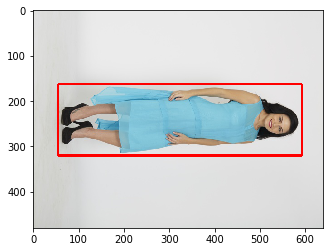

In [15]:
name = "1478971286066Soie9thNov20162288.png"
loc = ["C:\\Users\\npl\\Desktop\\Divyanshu\\Competition\\Dare2Complete\\Round_2\\images\\",name]
loc = ''.join(loc)
image = cv2.imread(loc)

# Evaluator can give any image location the above is just an example...
# but the model has to either be trained or loaded from Google drive link

predict_640x480x3(image, model)